<a href="https://colab.research.google.com/github/parniagoodarzi/AIKNTU4032/blob/main/hw1q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files . upload()


Saving 137.mat to 137.mat


In [4]:
import os
print (os.listdir("/content"))


['.config', 'sample_data']


In [7]:
from scipy.io import loadmat
file_path = "/content/137.mat"
data = loadmat(file_path)
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'X137_DE_time', 'X137_FE_time', 'X137RPM'])


In [8]:
print(type(data))
print (type(data['X137_FE_time']))

<class 'dict'>
<class 'numpy.ndarray'>


In [9]:
signal = data ['X137_FE_time']
print (signal [:10])


[[ 0.32420727]
 [-0.00739636]
 [-0.30900364]
 [-0.46597091]
 [-0.40556727]
 [-0.09060545]
 [ 0.31907091]
 [ 0.63916909]
 [ 0.77641273]
 [ 0.64040182]]


In [10]:
import numpy as np
sampling_rate = 48000
start_index = int(2* sampling_rate)
end_index = int (2.01 * sampling_rate)
signal_segment = signal[start_index:end_index]
time_segment = np.array ( range (start_index, end_index))/ sampling_rate

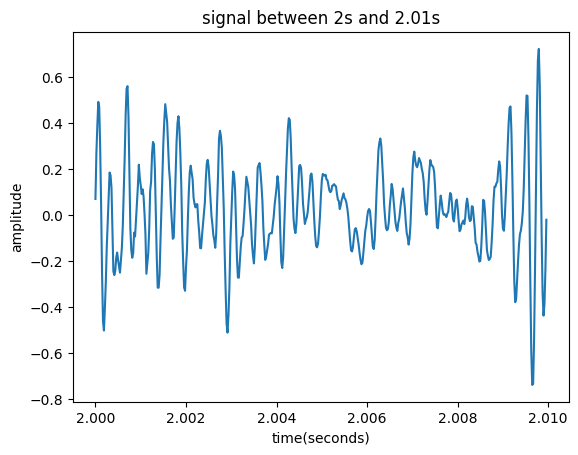

In [8]:
import matplotlib.pyplot as plt
plt.plot(time_segment,signal_segment)
plt.title("signal between 2s and 2.01s")
plt.xlabel("time(seconds)")
plt.ylabel("amplitude")
plt.show()

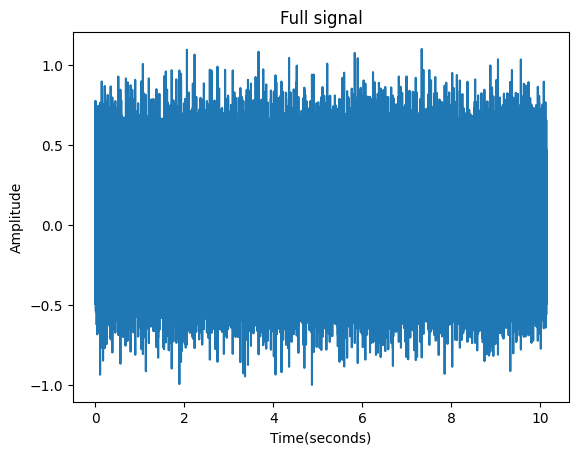

In [9]:
time_all = np.arange(len(signal))/ sampling_rate
plt.plot(time_all, signal)
plt.title("Full signal")
plt.xlabel("Time(seconds)")
plt.ylabel("Amplitude")
plt.show()


0.0


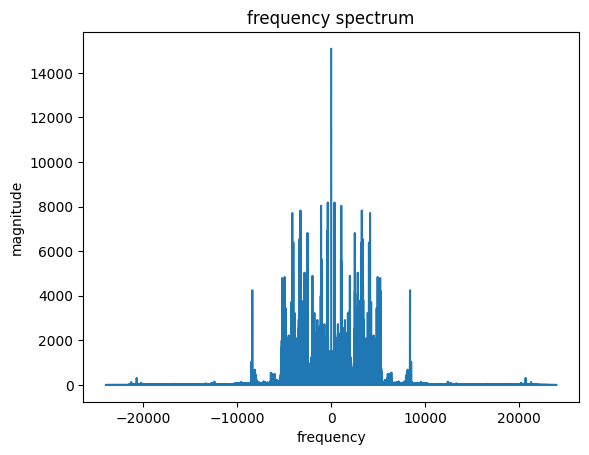

In [10]:
def frequency (signal,sampling_rate):
 signal_fft = np.fft.fft2(signal)
 freqs = np.fft.fftfreq(len(signal),1/ sampling_rate)
 magnitude = np.abs (signal_fft)
 dfi = np.argmax (magnitude)
 print(freqs[dfi])
 plt.plot(freqs,magnitude)
 plt.xlabel("frequency")
 plt.ylabel("magnitude")
 plt.title("frequency spectrum")
 plt.show()
frequency(signal,48000)

In [13]:
if signal.ndim==2:
  signal = signal.flatten()
segment_size = 128
overlap = 60
step_size = segment_size - overlap


signal_length = len(signal)
num_segments = (signal_length - segment_size) // step_size + 1

# Step 3: Initialize an array to store the segments
segments = np.zeros((num_segments, segment_size))

# Step 4: Extract segments
for i in range(num_segments):
    start_index = i * step_size
    end_index = start_index + segment_size
    segments[i] = signal[start_index:end_index]

# Now `segments` is a 2D NumPy array where each row is a segment
print(f"Shape of segments array: {segments.shape}")
print (segments)

Shape of segments array: (7158, 128)
[[ 0.32420727 -0.00739636 -0.30900364 ...  0.21901455  0.26277636
   0.29811455]
 [ 0.11916364  0.07992182  0.06122545 ...  0.08259273 -0.03821455
  -0.16087091]
 [ 0.07108727  0.11567091  0.12224545 ...  0.15881636  0.15881636
   0.14073636]
 ...
 [ 0.07622364  0.17484182  0.23093091 ...  0.03492727  0.15224182
   0.19805818]
 [-0.07889455  0.05382909  0.13683273 ...  0.13929818 -0.09286545
  -0.20196182]
 [-0.11998545 -0.04684364  0.07355273 ... -0.06554     0.01890182
   0.08608545]]


In [21]:
df= pd.DataFrame(segments)


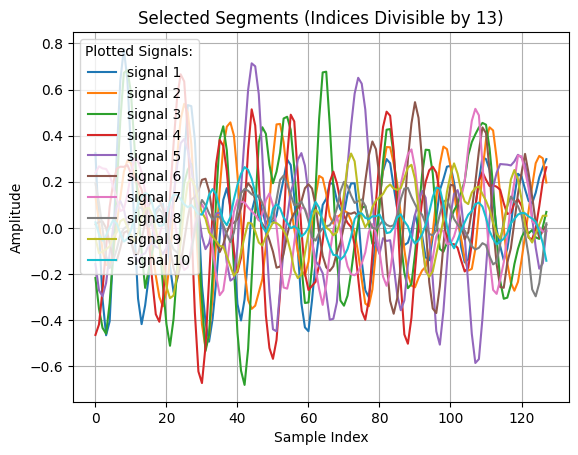

In [23]:
label = 0
for i in range(0, 130, 13):
    label += 1
    plt.plot(df.iloc[i], label=f"signal {label}")

plt.legend(title="Plotted Signals:")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Selected Segments (Indices Divisible by 13)")
plt.grid()
plt.show()

In [24]:
def extract_features(signal):
  meanv= np.mean(signal)
  stdv=np.std(signal)
  rmsv=np.sqrt(np.mean(np.square(signal)))
  return {meanv , stdv, rmsv}
features = extract_features (signal)
print (features)

{0.030963445598041702, 0.20157146363938155, 0.20393574948258927}


In [26]:
features_list = []
for i in range(len(df)):
  signal=df.iloc[i]
  features = extract_features(signal)
  features_list.append(features)
features_df = pd.DataFrame(features_list , columns = ["mean", "std", "rms"])
features_df.to_csv("extracted_features.csv", index=False)
print (features_df)




          mean       std       rms
0     0.030536  0.242698  0.240769
1     0.038186  0.142550  0.137340
2     0.035906  0.131827  0.126843
3     0.023830  0.130601  0.128409
4     0.044263  0.162987  0.168891
...        ...       ...       ...
7153  0.031473  0.148148  0.144766
7154  0.032366  0.112873  0.108133
7155  0.022958  0.124682  0.122550
7156  0.034977  0.208338  0.205381
7157  0.036243  0.244802  0.247470

[7158 rows x 3 columns]


In [27]:
from google.colab import files
files.download('/content/extracted_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')